# Project Steps

## 1. Exploratory Data Analysis (EDA)

## 2. LDA Projection

### 2.1. Compute Mu and Within-Class Scatter Matrix (SW)

   - SW = S0 + S1 + S2 + S3 + S4
   - S0-S4 = Σ(Xi - μi)(Xi - μi)^T

### 2.2. Compute Between-Class Scatter Matrix (SB)

   - m = 1/k * Σ(k) = 1/5 * Σ(μi)
   - SB = Σ(Ni (μi - m)(μi - m)^T)

### 2.3. Find LDA Projection Vectors

   - **2.3.1.** Create a function that outputs the LDA projections

   - S⁻¹W SB = V D V^T

### 2.4. Apply LDA from sklearn

### 2.5. Compare the Results

   - **2.5.1.** Compare the accuracy of both LDA from sklearn vs LDA from scratch

### 2.6. Implement PCA with 2 components and Compare the Results

   - **2.6.1.** Compare the results of PCA vs LDA

## 3. Implement Naive Bayes

### 3.1. Get Simple Probabilities

### 3.2. Calculate the P(X|Y) - the likelihood of observing X given each class by using histograms 

### 3.3. Train Naive Bayes

### 3.4. Test its Accuracy 

## 4. Implement Feature Reduction on the Whole Dataset

## 5. Feed 3 Other Models with the Reduced Features 

### 5.1. kNN

### 5.2. Decision Trees/ LDA /or QDA

### 5.3. Neural Networks



All imports 

In [197]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sc
import sklearn.discriminant_analysis as da
from sklearn.decomposition import PCA
from pylab import *
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


## Step 1 : Explore the data , EDA

In [198]:
# Specifying the path to your .npy file
train_file_path = 'fashion_train.npy'
test_file_path = 'fashion_test.npy'

# Load the data from the .npy file
train_data = np.load(train_file_path)
test_data = np.load(test_file_path)
print(train_data)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 3]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


### Plot their means

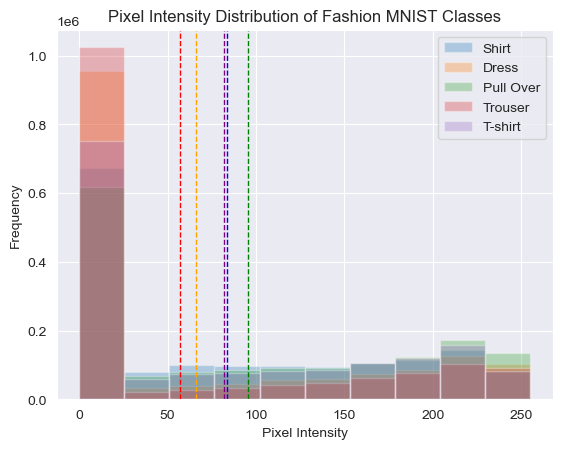

In [199]:
#get list of
t_shirt_list = []
trouser_list = []
pull_over_list = []
dress_list = []
shirt_list = []

#create subset of data with the different classes
for i in range(len(train_data)):
    if train_data[i][-1] == 0:
        t_shirt_list.append(train_data[i])
    elif train_data[i][-1] == 1:
        trouser_list.append(train_data[i])
    elif train_data[i][-1] == 2:
        pull_over_list.append(train_data[i])
    elif train_data[i][-1] == 3:
        dress_list.append(train_data[i])
    elif train_data[i][-1] == 4:
        shirt_list.append(train_data[i])

mu0_tshirts = np.mean(t_shirt_list)
mu1_trousers = np.mean(trouser_list)
mu2_pull_over = np.mean(pull_over_list)
mu3_dress = np.mean(dress_list)
mu4_shirt = np.mean(shirt_list)
concatenated_tshirt = np.concatenate(t_shirt_list)
concatenated_trouser = np.concatenate(trouser_list)
concatenated_pull_over = np.concatenate(pull_over_list)
concatenated_dress = np.concatenate(dress_list)
concatenated_shirt = np.concatenate(shirt_list)

#plot all the histograms on top of eachother

#add transparency
plt.hist(concatenated_shirt, alpha = 0.3)
plt.hist(concatenated_dress, alpha = 0.3)
plt.hist(concatenated_pull_over, alpha = 0.3)
plt.hist(concatenated_trouser, alpha = 0.3)
plt.hist(concatenated_tshirt, alpha = 0.3)
plt.legend(['Shirt', 'Dress', 'Pull Over', 'Trouser', 'T-shirt'])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Pixel Intensity Distribution of Fashion MNIST Classes')
#add mu lines
plt.axvline(mu0_tshirts, color='purple', linestyle='dashed', linewidth=1)
plt.axvline(mu1_trousers, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mu2_pull_over, color='green', linestyle='dashed', linewidth=1)
plt.axvline(mu3_dress, color='orange', linestyle='dashed', linewidth=1)
plt.axvline(mu4_shirt, color='blue', linestyle='dashed', linewidth=1)

## Step 2: LDA

## 2.1. Compute Mu and Within-Class Scatter Matrix (SW)

SW = S0 + S1 + S2 + S3 + S4
S0-S4 = Σ(Xi - μi)(Xi - μi)^T

In [200]:
# Get the data withouth the lables and only get the lables
x = train_data[:, :-1]
y = train_data[:, -1]

In [201]:
# Get the classes 

class_tshirt = train_data[train_data[:,-1]==0]
class_tshirt = class_tshirt[:,:-1]


class_trouser = train_data[train_data[:,-1]==1]
class_trouser = class_trouser[:,:-1]

class_pullover = train_data[train_data[:,-1]==2]
class_pullover = class_pullover[:,:-1]

class_dress = train_data[train_data[:,-1]==3]
class_dress = class_dress[:,:-1]


class_shirt = train_data[train_data[:,-1]==4]
class_shirt = class_shirt[:,:-1]

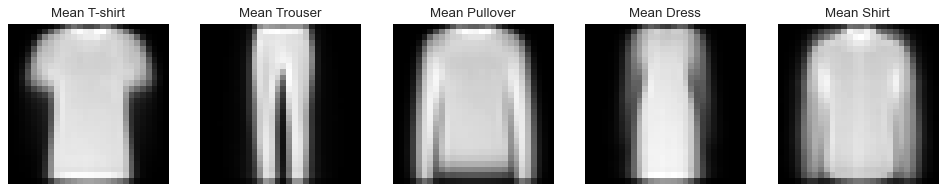

In [202]:
# Calculate the mean of each class
mean_tshirt = np.mean(class_tshirt,axis = 0)
mean_trouser = np.mean(class_trouser,axis = 0)
mean_pullover = np.mean(class_pullover,axis = 0)
mean_dress = np.mean(class_dress,axis = 0)
mean_shirt = np.mean(class_shirt,axis =0)


plt.figure(figsize=(15,10), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,5,1)
plt.imshow(mean_tshirt.reshape(28,28), cmap='gray')
plt.title('Mean T-shirt')
plt.axis('off')

plt.subplot(1,5,2)
plt.imshow(mean_trouser.reshape(28,28), cmap='gray')
plt.title('Mean Trouser')
plt.axis('off')

plt.subplot(1,5,3)
plt.imshow(mean_pullover.reshape(28,28), cmap='gray')
plt.title('Mean Pullover')
plt.axis('off')

plt.subplot(1,5,4)
plt.imshow(mean_dress.reshape(28,28), cmap='gray')
plt.title('Mean Dress')
plt.axis('off')

plt.subplot(1,5,5)
plt.imshow(mean_shirt.reshape(28,28), cmap='gray')
plt.title('Mean Shirt')
plt.axis('off')

plt.show()

In [203]:
# Get the scatter matrix for each class (S_0, S_1, S_2, S_3, S_4)
scatter_tshirt = np.cov(class_tshirt.T)
scatter_trouser = np.cov(class_trouser.T)
scatter_pullover = np.cov(class_pullover.T)
scatter_dress = np.cov(class_dress.T)
scatter_shirt = np.cov(class_shirt.T)


In [204]:
# Calculating S_w -> scatter matrix
S_w = scatter_tshirt + scatter_trouser + scatter_pullover + scatter_dress + scatter_shirt


## 2.1 Get the betweeness scatter matrix Sb
m = 1/k * Σ(k) = 1/5 * Σ(μi)
SB = Σ(Ni (μi - m)(μi - m)^T)

In [205]:
# Get m (global mean)
m = 1/5*(mean_tshirt+mean_trouser+mean_pullover+mean_dress+mean_shirt)
#print(f" This is m {m}")

In [206]:
# betweeness_scatter
S_b= (
len(class_tshirt)*np.outer((mean_tshirt-m),(mean_tshirt-m).T) + 
len(class_trouser)*np.outer((mean_trouser-m),(mean_trouser-m).T)+
len(class_pullover)*np.outer((mean_pullover-m),(mean_pullover-m).T)+ 
len(class_dress)*np.outer((mean_dress-m),(mean_dress-m).T) + 
len(class_shirt)*np.outer((mean_shirt-m),(mean_shirt-m).T)
)

In [207]:
# find M, which is the discriminant matrix  M= S_w(inverse) * S_b
S_W_inv = np.linalg.inv(S_w)
discr_matrix = np.dot(S_W_inv , S_b)



### 2.3. Find LDA Projection Vectors

In [208]:
# Get the eigen values and eigen vectors of the discriminant matrix  M
eigen_values, eigen_vectors = np.linalg.eig(discr_matrix)
#eigen_vectors[0,]


In [209]:
# Another way of finding the eigen values by sk learn 
sc.linalg.eigh(S_b,S_w)

(array([-1.35738813e-09, -1.28176954e-09, -1.09999181e-09, -1.02075206e-09,
        -9.60106050e-10, -8.81546515e-10, -8.61035064e-10, -8.49235523e-10,
        -7.80339949e-10, -7.55527864e-10, -7.16353921e-10, -6.65257655e-10,
        -6.17273816e-10, -6.12266080e-10, -5.62992825e-10, -5.42241784e-10,
        -5.20059909e-10, -4.81033974e-10, -4.77237354e-10, -4.50508306e-10,
        -4.46969547e-10, -4.26834196e-10, -4.05714769e-10, -3.96017968e-10,
        -3.80976714e-10, -3.72227753e-10, -3.55918675e-10, -3.44859822e-10,
        -3.41513249e-10, -3.39317935e-10, -3.18521143e-10, -3.10513448e-10,
        -3.06045288e-10, -3.04490977e-10, -2.82782436e-10, -2.77065676e-10,
        -2.75132757e-10, -2.68976983e-10, -2.58881303e-10, -2.47066074e-10,
        -2.47000154e-10, -2.40857587e-10, -2.35216078e-10, -2.33746901e-10,
        -2.24764083e-10, -2.23831892e-10, -2.19817740e-10, -2.18237514e-10,
        -2.07807600e-10, -2.06086044e-10, -1.98022522e-10, -1.97862584e-10,
        -1.9

In [210]:
#eigen_values, eigen_vectors = np.linalg.eig(discr_matrix)
eigen_values, eigen_vectors =sc.linalg.eigh(S_b,S_w)

# Create pairs of eigenvalues and eigenvectors
eigen_pairs = [(eigen_values[i], eigen_vectors[:, i]) for i in range(len(eigen_values))]

# Sort the eigenvalue-eigenvector pairs based on eigenvalues
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

# Extract the top 2 eigenvalues and corresponding eigenvectors
top_eigenvalues = [eigen_pairs[i][0] for i in range(2)]
top_eigenvectors = [eigen_pairs[i][1] for i in range(2)]

# Convert the lists to numpy arrays if needed
top_eigenvalues = np.array(top_eigenvalues)
top_eigenvectors = np.array(top_eigenvectors)

# Now top_eigenvalues and top_eigenvectors contain the top 2 eigenvalues and corresponding eigenvectors
print(top_eigenvectors.shape)
eigen_values_sum = sum(eigen_values)
for i,j in enumerate(eigen_pairs):
    print("Eigenvalue {0:}: {1: .2%}".format(i+1,(j[0]/eigen_values_sum).real))
    #from this we can see that we want the first 4 features
W = np.hstack((eigen_pairs[0][1].reshape(784,1),eigen_pairs[1][1].reshape(784,1)))
#print('Matrix W:\n', W.real)
print(W.shape)
#print(np.real(top_eigenvectors).T)
#print(np.real(top_eigenvectors).T.shape)

(2, 784)
Eigenvalue 1:  60.75%
Eigenvalue 2:  20.39%
Eigenvalue 3:  13.28%
Eigenvalue 4:  5.58%
Eigenvalue 5:  0.00%
Eigenvalue 6:  0.00%
Eigenvalue 7:  0.00%
Eigenvalue 8:  0.00%
Eigenvalue 9:  0.00%
Eigenvalue 10:  0.00%
Eigenvalue 11:  0.00%
Eigenvalue 12:  0.00%
Eigenvalue 13:  0.00%
Eigenvalue 14:  0.00%
Eigenvalue 15:  0.00%
Eigenvalue 16:  0.00%
Eigenvalue 17:  0.00%
Eigenvalue 18:  0.00%
Eigenvalue 19:  0.00%
Eigenvalue 20:  0.00%
Eigenvalue 21:  0.00%
Eigenvalue 22:  0.00%
Eigenvalue 23:  0.00%
Eigenvalue 24:  0.00%
Eigenvalue 25:  0.00%
Eigenvalue 26:  0.00%
Eigenvalue 27:  0.00%
Eigenvalue 28:  0.00%
Eigenvalue 29:  0.00%
Eigenvalue 30:  0.00%
Eigenvalue 31:  0.00%
Eigenvalue 32:  0.00%
Eigenvalue 33:  0.00%
Eigenvalue 34:  0.00%
Eigenvalue 35:  0.00%
Eigenvalue 36:  0.00%
Eigenvalue 37:  0.00%
Eigenvalue 38:  0.00%
Eigenvalue 39:  0.00%
Eigenvalue 40:  0.00%
Eigenvalue 41:  0.00%
Eigenvalue 42:  0.00%
Eigenvalue 43:  0.00%
Eigenvalue 44:  0.00%
Eigenvalue 45:  0.00%
Eigenva

In [211]:
# Transoforming the eigenvectoræs to real numbers
top_eigenvectors_real_nb = np.real(top_eigenvectors)
print(top_eigenvectors_real_nb.shape)
x1 =top_eigenvectors_real_nb[0]
x2 = top_eigenvectors_real_nb[1]
print(x1.shape)
print(x2.shape)



(2, 784)
(784,)
(784,)


### Create  a function that applyies LDA to a dataset

In [212]:
def apply_lda_to_each_img_in_array(img_array):
    lda_data = [] #create an empty array to store the lda data
    for row in img_array: #for each row in the array
        img_data = row[:-1] #get the img data
        img_label = row[-1] #get the img label

        imgx1 = np.dot(img_data,x1) #apply lda to the img
        imgx2 = np.dot(img_data,x2) #apply lda to the img
        lda_data.append([imgx1,imgx2,img_label]) #append the img data and label to the lda_data array
    lda_data = np.array(lda_data) #convert the array to a numpy array
    return lda_data

### 2.4. Apply LDA from sklearn

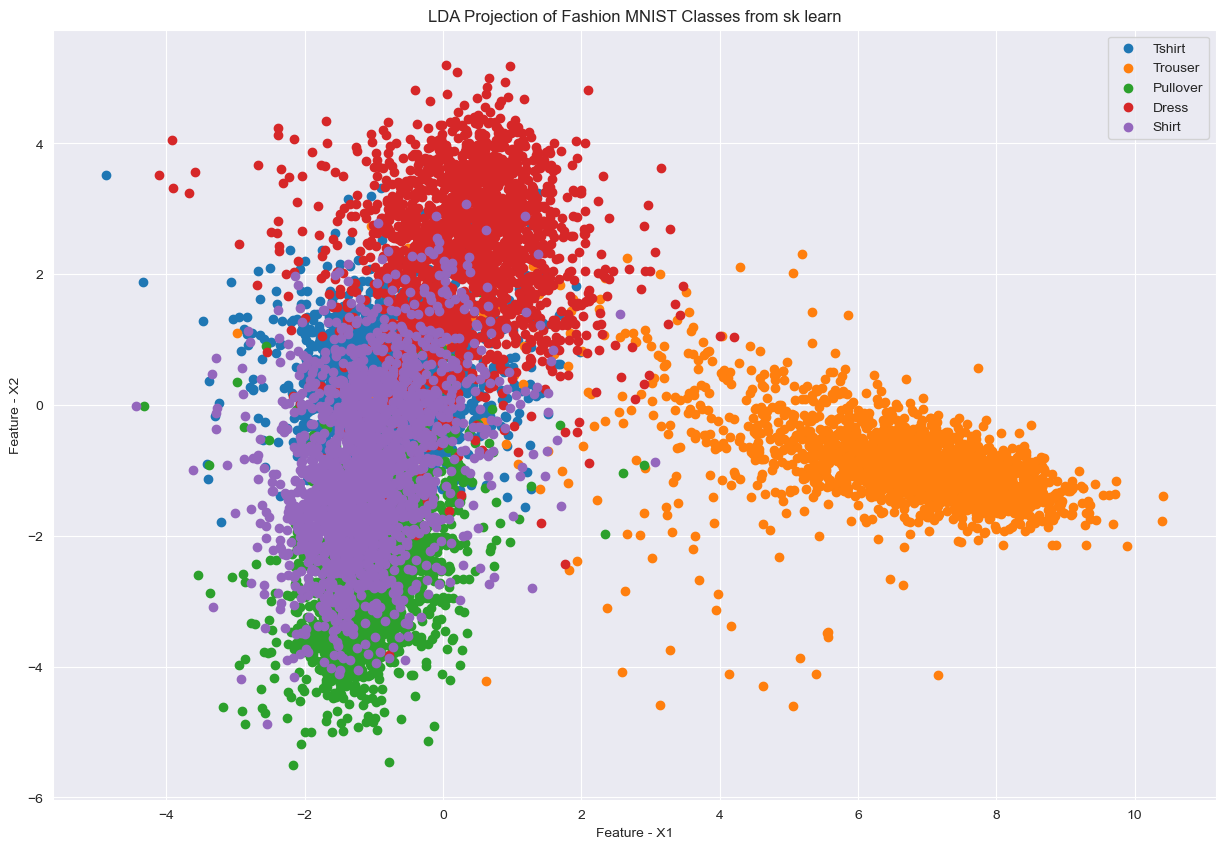

In [213]:
# Add LDA from a library and compare the reuslts

tm = top_eigenvectors_real_nb
new = np.dot(tm,x.T)
final_lda = new.T

lda = da.LinearDiscriminantAnalysis(n_components=2,solver='eigen')
b = lda.fit(x,y)
lda_sklearn_projection = lda.transform(x)

#print(new.T)
#print(lda_sklearn_projection)

are_results_similar = np.allclose(new.T,lda_sklearn_projection)
#print("Are results similar?",are_results_similar)

X_r2 = lda.fit(x, y).transform(x)
plt.figure(figsize=(15,10))
#plt.scatter(X_r2[:,0],X_r2[:,1],c=y)

# Scatter plot for class 0
plt.scatter(X_r2[y == 0, 0], X_r2[y == 0, 1], label='Tshirt')

# Scatter plot for class 1
plt.scatter(X_r2[y == 1, 0], X_r2[y == 1, 1], label='Trouser')
# Scatter plot for class 2
plt.scatter(X_r2[y == 2, 0], X_r2[y == 2, 1], label='Pullover')

# Scatter plot for class 3
plt.scatter(X_r2[y == 3, 0], X_r2[y == 3, 1], label='Dress')
# Scatter plot for class 4
plt.scatter(X_r2[y == 4, 0], X_r2[y == 4, 1], label='Shirt')
plt.legend()
plt.title('LDA Projection of Fashion MNIST Classes from sk learn')
plt.xlabel('Feature - X1')
plt.ylabel('Feature - X2')
plt.show()

### 2.5. Compare the reuslts LDA from scratch vs LDA sk learn

Text(0.5, 1.0, 'LDA Projection of Fashion MNIST Classes from scratch')

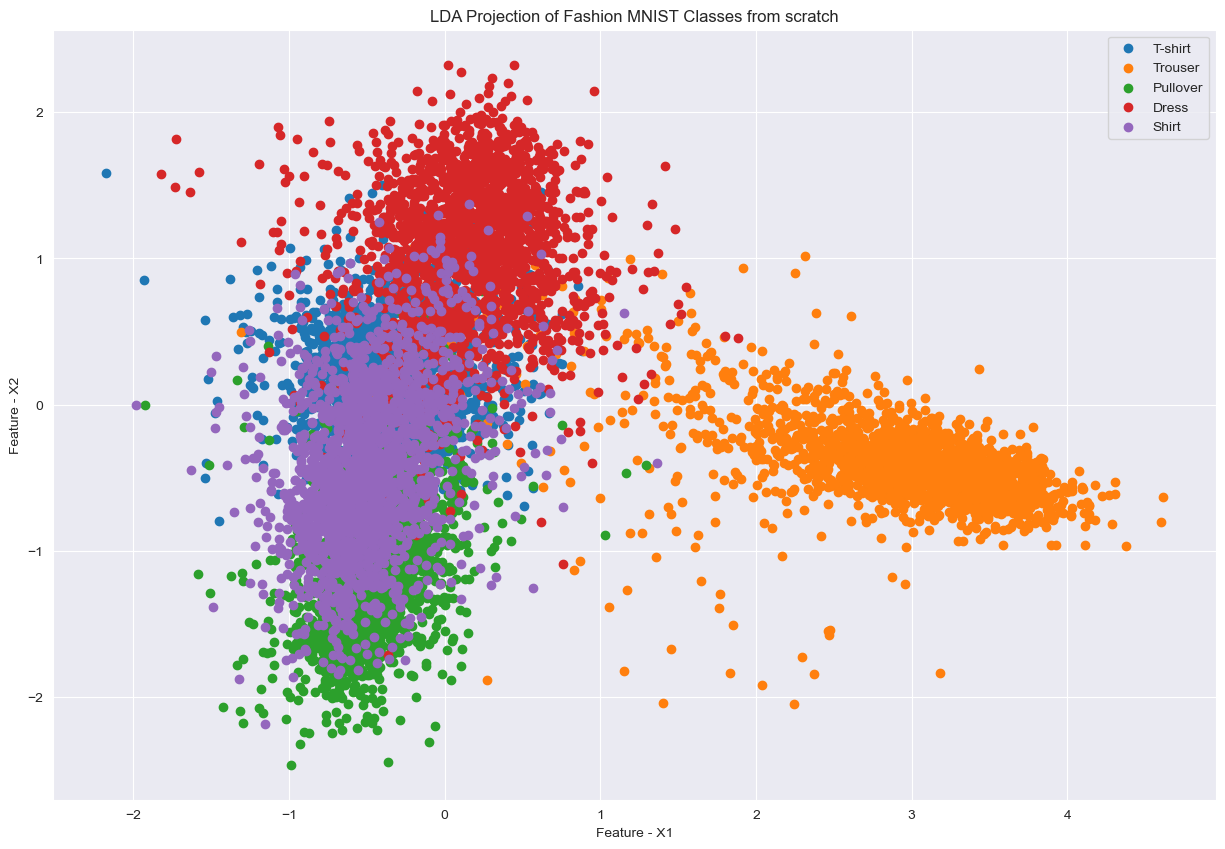

In [214]:
#Do scatter plot for each class to seee how LDA works

plt.figure(figsize=(15, 10))
tshirt_proj_x1 = np.dot(class_tshirt,x1)
tshirt_proj_x2 = np.dot(class_tshirt,x2)

plt.scatter(tshirt_proj_x1,tshirt_proj_x2, label = 'T-shirt')


trouser_proj_x1 = np.dot(class_trouser,x1)
trouser_proj_x2 = np.dot(class_trouser,x2)

plt.scatter(trouser_proj_x1,trouser_proj_x2, label = 'Trouser')


pullover_proj_x1 = np.dot(class_pullover,x1)
pullover_proj_x2 = np.dot(class_pullover,x2)

plt.scatter(pullover_proj_x1,pullover_proj_x2, label = 'Pullover')


dress_proj_x1 = np.dot(class_dress,x1)
dress_proj_x2 = np.dot(class_dress,x2)

plt.scatter(dress_proj_x1,dress_proj_x2, label = 'Dress')


shirts_proj_x1 = np.dot(class_shirt,x1)
shirts_proj_x2 = np.dot(class_shirt,x2)

plt.scatter(shirts_proj_x1,shirts_proj_x2, label = 'Shirt')
plt.xlabel('Feature - X1')
plt.ylabel('Feature - X2')
plt.legend()
plt.title('LDA Projection of Fashion MNIST Classes from scratch')

### 2.5.1 Compare  the accuracies of both LDA from scratch and LDA from sk learn 

In [215]:
## TODO

### 2.6. Implement PCA with 2 components 

(2,)


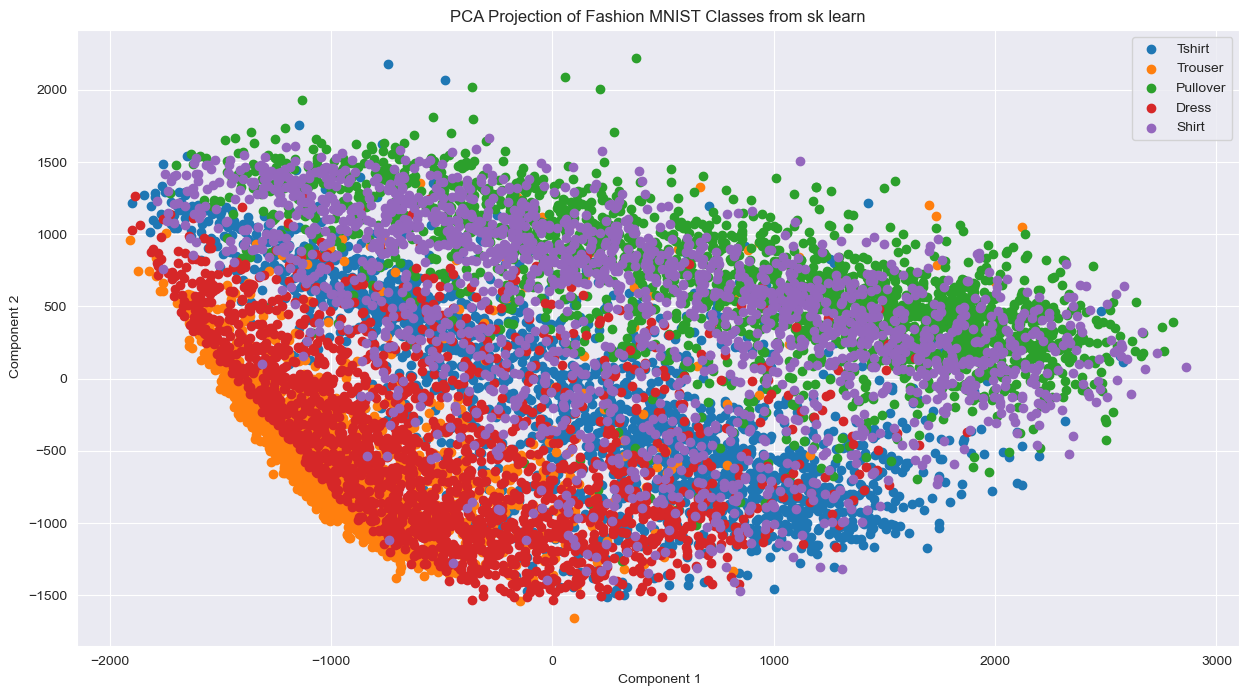

In [216]:
# ADD pca and see which one does a better job maybe


pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)

print(X_pca[0].shape)

plt.figure(figsize=(15,8))
#plt.scatter(X_r2[:,0],X_r2[:,1],c=y)

# Scatter plot for class 0
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], label='Tshirt')

# Scatter plot for class 1
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], label='Trouser')
# Scatter plot for class 2
plt.scatter(X_pca[y == 2, 0], X_pca[y == 2, 1], label='Pullover')
plt.title('PCA Projection of Fashion MNIST Classes from sk learn')
# Scatter plot for class 3
plt.scatter(X_pca[y == 3, 0], X_pca[y == 3, 1], label='Dress')
# Scatter plot for class 4
plt.scatter(X_pca[y == 4, 0], X_pca[y == 4, 1], label='Shirt')
plt.xlabel(' Component 1')
plt.ylabel(' Component 2')
plt.legend()
plt.show()

### 2.6.1. Ccompare the result PCA vs LDA

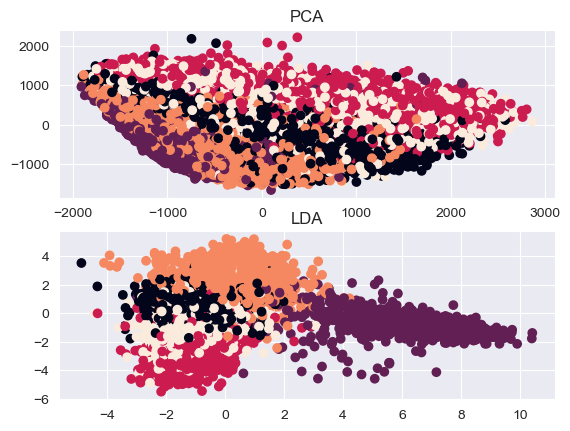

In [217]:

# subploting and title setting
subplot(2,1,1)
title("PCA")
# plotting the pca
plt.scatter(X_pca[:,0],X_pca[:,1], c=y)
# subploting and title
subplot(2,1,2)
title("LDA")
# plotting LDA
plt.scatter(X_r2[:,0],X_r2[:,1], c=y)
plt.show()

# Step 3: Implementing Naive Bayes
### 3.1 Getting the simple probabilities



In [218]:
count_0_tshirt = 0
count_1_trousers = 0
count_2_pull_over = 0
count_3_dress = 0
count_4_shirt = 0
num_rows = 10000



#Loop through the last column
for value in y:
    if value == 0:
        count_0_tshirt += 1
    elif value == 1:
        count_1_trousers += 1
    elif value == 2:
        count_2_pull_over += 1
    elif value == 3:
        count_3_dress += 1
    elif value == 4:
        count_4_shirt += 1

#Get the simple probabilities
P_tshirt = count_0_tshirt / num_rows
P_trouser = count_1_trousers / num_rows
P_pull_over = count_2_pull_over/ num_rows
P_dress = count_3_dress / num_rows
P_shirt = count_4_shirt / num_rows

print(f" P(T-shirt) = {P_tshirt}")
print(f" P(Trousers) = {P_trouser}")
print(f" P(Pull Over) = {P_pull_over}")
print(f" P(Dress) = {P_dress}")
print(f" P(Shirt) = {P_shirt}")

simpprob = {"T_shirt":P_tshirt,"Trouser":P_trouser,"Pull_over":P_pull_over,"Dress":P_dress,"Shirt":P_shirt}

 P(T-shirt) = 0.2033
 P(Trousers) = 0.1947
 P(Pull Over) = 0.2001
 P(Dress) = 0.2005
 P(Shirt) = 0.2014


### 3.2. Calculate the P(X|Y) - the likelihood of observing X given each class by using histograms 

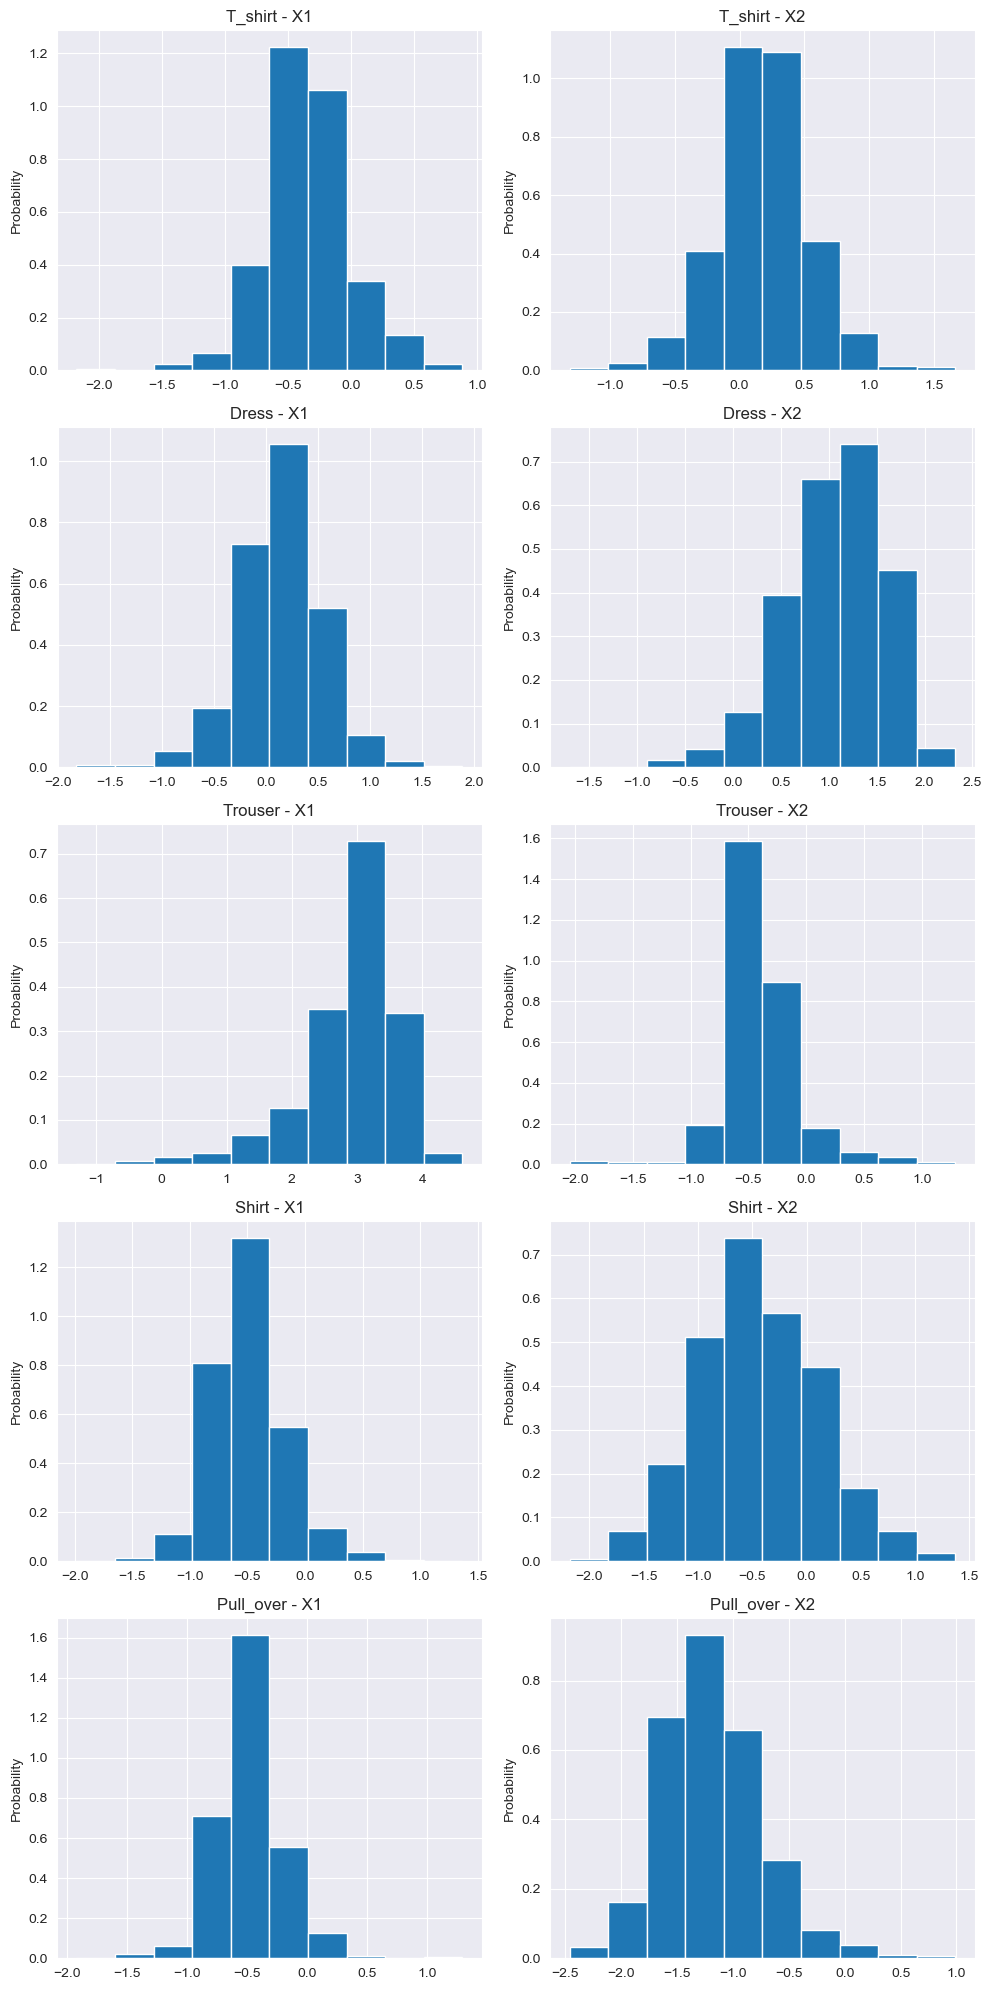

In [219]:
def show_histograms():
    categories = ['T_shirt', 'Dress', 'Trouser', 'Shirt', 'Pull_over']
    x1_data = [tshirt_proj_x1, dress_proj_x1, trouser_proj_x1, shirts_proj_x1, pullover_proj_x1]
    x2_data = [tshirt_proj_x2, dress_proj_x2, trouser_proj_x2, shirts_proj_x2, pullover_proj_x2]
    fig, axs = plt.subplots(5, 2, figsize=(10, 20))

    for i in range(5):
        axs[i, 0].hist(x1_data[i], density=1)
        axs[i, 0].set_title(f'{categories[i]} - X1')
        axs[i, 0].set_ylabel('Probability')
        axs[i, 1].hist(x2_data[i], density=1)
        axs[i, 1].set_title(f'{categories[i]} - X2')
        axs[i, 1].set_ylabel('Probability')
    plt.tight_layout()
    #plt.show()

show_histograms()


### 3.3. Train Naive Bayes
$$\ P(C_i | X_1, X_2) = \frac{P(C_i) \cdot P(X_1 | C_i) \cdot P(X_2 | C_i)}{P(X_1) \cdot P(X_2)} \$$

Where:
- \( C_i \) represents one of the 5 classes.
- \( X_1 \) and \( X_2 \) are ower features.
- \( P(C_i | X_1, X_2) \) is the posterior probability of class \( C_i \) given the features.
- \( P(C_i) \) is the prior probability of class \( C_i \).
- \( P(X_1 | C_i) \) is the likelihood of \( X_1 \) given class \( C_i \).
- \( P(X_2 | C_i) \) is the likelihood of \( X_2 \) given class \( C_i \).
- \( P(X_1) \) and \( P(X_2) \) are the marginal probabilities of \( X_1 \) and \( X_2 \), respectively.


In [220]:
def apply_naive_bayes(feature1, feature2):
    categories = ['T_shirt', 'Dress', 'Trouser', 'Shirt', 'Pull_over']
    x1_data = [tshirt_proj_x1, dress_proj_x1, trouser_proj_x1, shirts_proj_x1, pullover_proj_x1]
    x2_data = [tshirt_proj_x2, dress_proj_x2, trouser_proj_x2, shirts_proj_x2, pullover_proj_x2]
    results = {}

    for i in range(5):
        k,bins = np.histogram(x1_data[i], density=True)
        bin_index = np.digitize(feature1,bins)

        if 0<bin_index<len(bins):
            binprob1 = k[bin_index-1]
        else:
            binprob1 = 0

        k,bins = np.histogram(x2_data[i], density=True)
        bin_index = np.digitize(feature2,bins)

        if 0<bin_index<len(bins):
            binprob2 = k[bin_index-1]
        else:
            binprob2 = 0

        #print(f'probability x1: {binprob1} and probability x2: {binprob2}')

        class_simp_prob = simpprob[categories[i]]
        #print(f'probability of {categories[i]}: {class_simp_prob}')

        probabilitet = binprob1*binprob2*class_simp_prob
        #print(probabilitet)

        results[categories[i]] = probabilitet

    #print(results)
    max_key = max(results, key=results.get)
    max_value = results[max_key]
    #plt.tight_layout()
    #plt.show()
    return max_key, max_value






### 3.4. Test the accuracy of Naive Bayes

In [221]:
def get_accuracy_of_naive_bayes(lda_data_with_label):
    class_dict = {"T_shirt":0,"Trouser":1,"Pull_over":2,"Dress":3,"Shirt":4}
    correct = 0
    for row in lda_data_with_label:
        feature1 = row[0]
        feature2 = row[1]
        actual_class = row[2]

        predicted_class = apply_naive_bayes(feature1,feature2)[0]
        if class_dict[predicted_class] == actual_class:
            correct += 1
    accuracy = (correct/len(lda_data_with_label))
    return accuracy



### 3.4. Test Naive Bayes' accuracy

In [222]:
test_data_with_lda = apply_lda_to_each_img_in_array(test_data)
naivebayes_accuracy = get_accuracy_of_naive_bayes(test_data_with_lda)

print(f'accuracy: {naivebayes_accuracy*100}%, {naivebayes_accuracy*len(test_data_with_lda)} out of {len(test_data_with_lda)} correct')

accuracy: 72.1%, 3605.0 out of 5000 correct


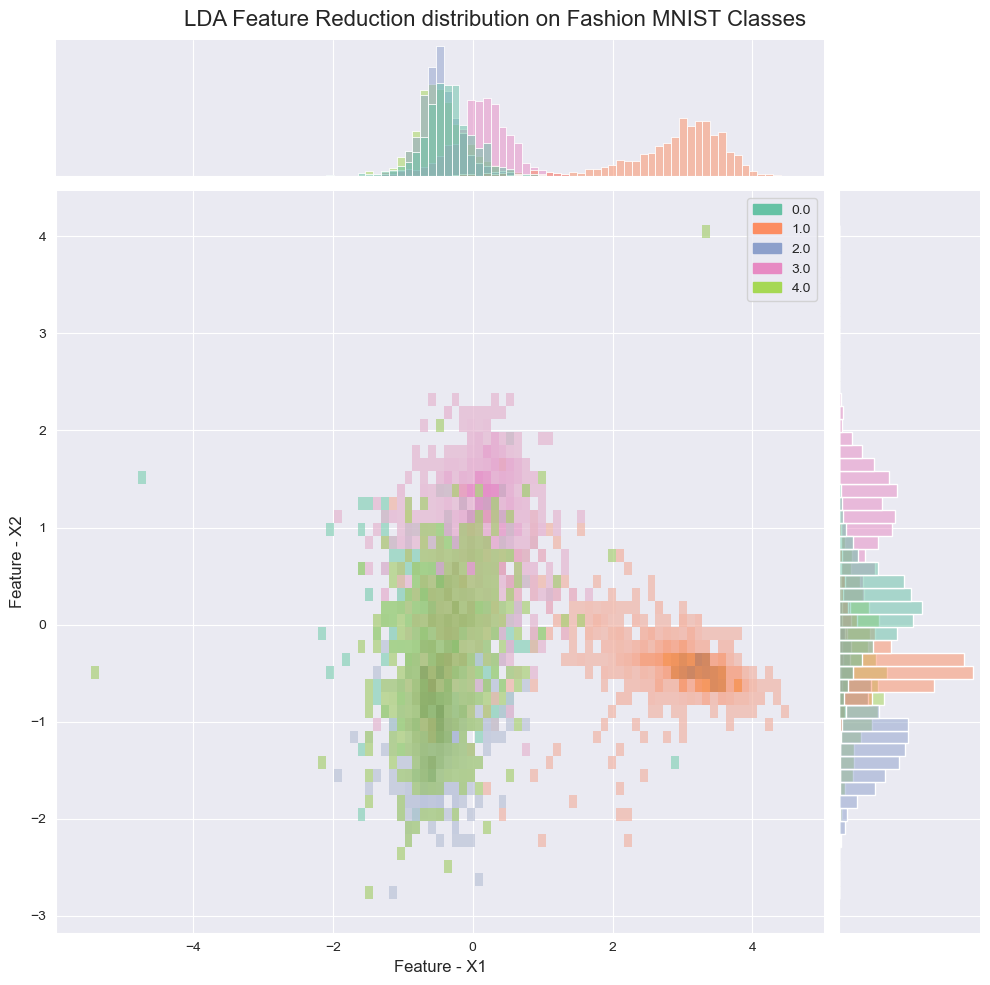

In [223]:
import seaborn as sns
jp = sns.jointplot(x=test_data_with_lda[:,0], y=test_data_with_lda[:,1],height = 10,alpha = 0.7,kind='hist', hue=test_data_with_lda[:,2],palette="Set2",marginal_kws=dict(palette = "Set2", alpha = .5,))
jp.set_axis_labels('Feature - X1', 'Feature - X2', fontsize=12)
jp.fig.suptitle('LDA Feature Reduction distribution on Fashion MNIST Classes', fontsize=16)
jp.fig.tight_layout()
plt.show()

In [224]:
"""
def apply_lda_to_img(img_array):
    imgx1 = np.dot(img_array,x1)
    imgx2 = np.dot(img_array,x2)
    return imgx1, imgx2

ldatest1x1 = np.dot(test1,x1)
ldatest1x2 = np.dot(test1,x2)
print(ldatest1x1)
print(ldatest1x2)

tshirt_proj_x1 = np.dot(class_tshirt,x1)
tshirt_proj_x2 = np.dot(class_tshirt,x2)

plt.scatter(tshirt_proj_x1,tshirt_proj_x2)

trouser_proj_x1 = np.dot(class_trouser,x1)
trouser_proj_x2 = np.dot(class_trouser,x2)


plt.scatter(tshirt_proj_x1,tshirt_proj_x2,alpha=0.1)
plt.scatter(trouser_proj_x1,trouser_proj_x2,alpha=0.05)

pullover_proj_x1 = np.dot(class_pullover,x1)
pullover_proj_x2 = np.dot(class_pullover,x2)

plt.scatter(pullover_proj_x1,pullover_proj_x2)

dress_proj_x1 = np.dot(class_dress,x1)
dress_proj_x2 = np.dot(class_dress,x2)

plt.scatter(dress_proj_x1,dress_proj_x2)

shirts_proj_x1 = np.dot(class_shirt,x1)
shirts_proj_x2 = np.dot(class_shirt,x2)

plt.scatter(shirts_proj_x1,shirts_proj_x2)
plt.scatter(ldatest1x1,ldatest1x2, color = 'black')
"""


"\ndef apply_lda_to_img(img_array):\n    imgx1 = np.dot(img_array,x1)\n    imgx2 = np.dot(img_array,x2)\n    return imgx1, imgx2\n\nldatest1x1 = np.dot(test1,x1)\nldatest1x2 = np.dot(test1,x2)\nprint(ldatest1x1)\nprint(ldatest1x2)\n\ntshirt_proj_x1 = np.dot(class_tshirt,x1)\ntshirt_proj_x2 = np.dot(class_tshirt,x2)\n\nplt.scatter(tshirt_proj_x1,tshirt_proj_x2)\n\ntrouser_proj_x1 = np.dot(class_trouser,x1)\ntrouser_proj_x2 = np.dot(class_trouser,x2)\n\n\nplt.scatter(tshirt_proj_x1,tshirt_proj_x2,alpha=0.1)\nplt.scatter(trouser_proj_x1,trouser_proj_x2,alpha=0.05)\n\npullover_proj_x1 = np.dot(class_pullover,x1)\npullover_proj_x2 = np.dot(class_pullover,x2)\n\nplt.scatter(pullover_proj_x1,pullover_proj_x2)\n\ndress_proj_x1 = np.dot(class_dress,x1)\ndress_proj_x2 = np.dot(class_dress,x2)\n\nplt.scatter(dress_proj_x1,dress_proj_x2)\n\nshirts_proj_x1 = np.dot(class_shirt,x1)\nshirts_proj_x2 = np.dot(class_shirt,x2)\n\nplt.scatter(shirts_proj_x1,shirts_proj_x2)\nplt.scatter(ldatest1x1,ldatest1

## 4. Implement feature reduction on the whole dataset



In [225]:
# Get the data withouth the lables and only get the lables
x_train_data = train_data[:, :-1]
y_train_data = train_data[:, -1]

x_test_data = test_data[:, :-1]
y_test_data = test_data[:, -1]

### 4.1. Get explained variance and cumulative explained variance for PCA

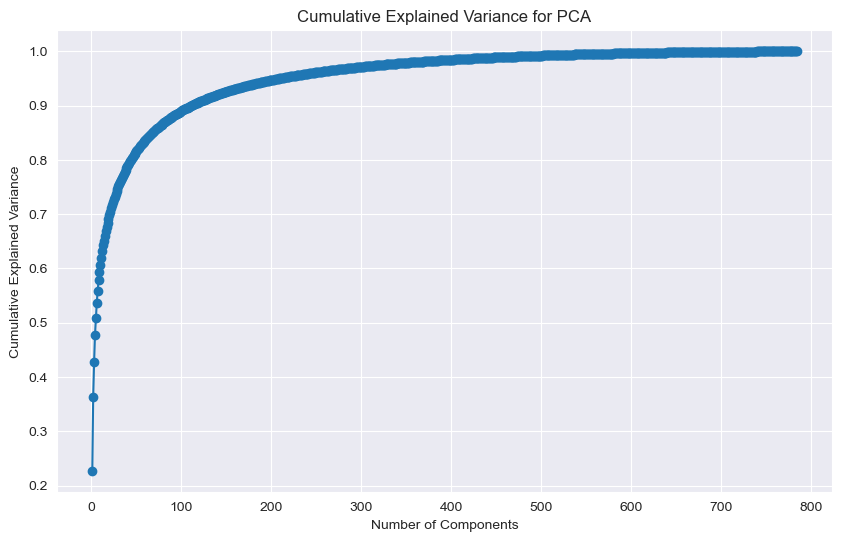

In [226]:
# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_train_data)

# Fit PCA and transform the data
pca = PCA()
x_pca = pca.fit_transform(x_scaled)

# Get explained variance and cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.title('Cumulative Explained Variance for PCA')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [227]:
# Take 100 components, because accoring to the graph a 100 explains 90 percent of our data
n_components = 100
pca = PCA(n_components=n_components)
x_pca = pca.fit_transform(x_scaled)

### 4.1. Get explained variance and cumulative explained variance for LDA

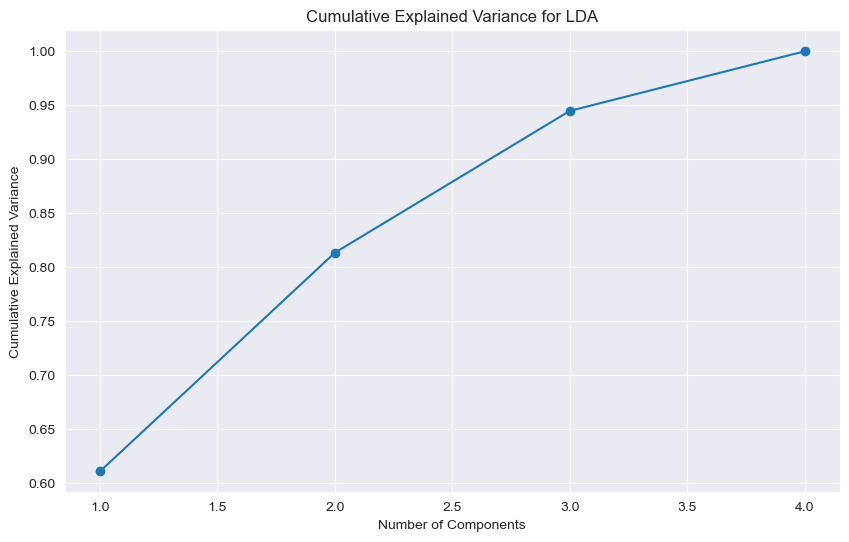

In [228]:
# Fit LDA
lda = LinearDiscriminantAnalysis(n_components=None, solver='eigen')  # Use None to get all components
lda.fit(x_train_data, y_train_data)

# Get explained variance and cumulative explained variance for LDA
explained_variance_ratio_lda = lda.explained_variance_ratio_
cumulative_variance_ratio_lda = np.cumsum(explained_variance_ratio_lda)

# Plot the cumulative explained variance for LDA
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio_lda) + 1), cumulative_variance_ratio_lda, marker='o')
plt.title('Cumulative Explained Variance for LDA')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Transform the data using LDA
x_lda = lda.transform(x_train_data)


In [229]:
# just the feautes 
#x_train_data
#x_test_data
#y_train_data
#y_test_data

In [230]:
# PCA with 100 components
pca = PCA(n_components=100)
x_train_pca = pca.fit_transform(x_train_data)
x_test_pca = pca.transform(x_test_data)

### 4.2. Visualize the effects of principal components on an image

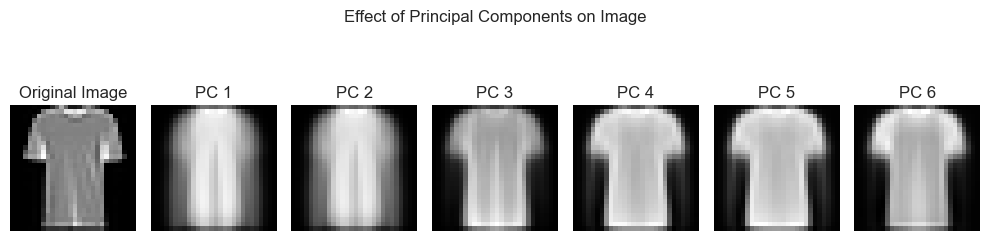

In [231]:

#Visualise the effects of principal components on an image
def visualize_pca_effect(original_image, transformed_images, components):
    plt.figure(figsize=(10, 3))
    
    # Plot the original image
    plt.subplot(1, components + 1, 1)
    plt.imshow(original_image.reshape(28, 28), cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    # Plot the transformed images along each principal component
    for i in range(1,components+1):
        transformed_image = np.dot(transformed_images[:i], pca.components_[:i, :])
        #add the mean to obtain the actual datapoints, since PCA when applied subtracts the mean.
        transformed_image += pca.mean_
        
        plt.subplot(1, components + 1, i-1 + 2)
        plt.imshow(transformed_image.reshape(28, 28), cmap='gray')
        plt.title(f'PC {i}')
        plt.axis('off')
        
    plt.suptitle('Effect of Principal Components on Image')
    plt.tight_layout()
    plt.show()

# Visualize the effects of the first six principal components
visualize_pca_effect(x_train_data[0], x_train_pca[0, :], 6)

In [232]:
# LDA with 4 components
lda = LinearDiscriminantAnalysis(n_components=4, solver='eigen')
x_train_lda = lda.fit_transform(x_train_data, y_train_data)
x_test_lda = lda.transform(x_test_data)



## 5. Feed 3 other models with the reduced features 



In [233]:
# imports for  kNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import  classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import make_scorer, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import make_scorer, accuracy_score, classification_report, f1_score as calculate_f1_score


In [234]:
# imports for decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [235]:
# imports for neural networks 
import tensorflow.python as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [236]:
#pip install tensorflow

### 5.1. kNN

#### 5.1.1. kNN with no PCA, no LDA

KNN Validation Accuracy no PCA or LDA: 0.822
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.84      0.80      1000
           1       0.99      0.96      0.97      1000
           2       0.78      0.84      0.81      1000
           3       0.91      0.87      0.89      1000
           4       0.68      0.59      0.63      1000

    accuracy                           0.82      5000
   macro avg       0.82      0.82      0.82      5000
weighted avg       0.82      0.82      0.82      5000
Cross-Validation Accuracy: 0.8304
Cross-Validation F1 Score: 0.8292
Cross-Validation Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.85      0.80      2033
           1       0.99      0.96      0.97      1947
           2       0.81      0.85      0.83      2001
           3       0.91      0.88      0.89      2005
           4       0.71      0.61      0.66      2014

    accura

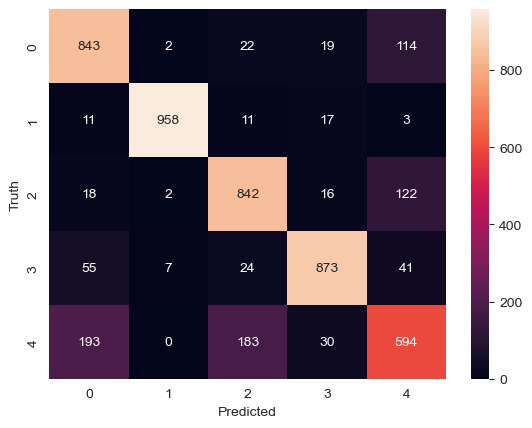

In [237]:
# Create and train the KNN classifier
knn = KNeighborsClassifier()
knn.fit(x_train_data, y_train_data)

# Make predictions on the test data
knn_predictions = knn.predict(x_test_data)

# Calculate accuracy
knn_accuracy = accuracy_score(y_test_data, knn_predictions)
print(f'KNN Validation Accuracy no PCA or LDA: {knn_accuracy}')

# Confusion matrix and heatmap
cm_knn = confusion_matrix(y_test_data, knn_predictions)
sns.heatmap(cm_knn, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
#plt.show()

# Calculate precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test_data, knn_predictions, average='weighted')

#print(f'Precision: {precision:.4f}')
#print(f'Recall: {recall:.4f}')
#print(f'F1 Score: {f1_score:.4f}')

print("Classification Report:")
print(classification_report(y_test_data, knn_predictions))


# Perform cross-validation for accuracy
cv_accuracy = cross_val_score(knn, x_train_data, y_train_data, cv=5, scoring=make_scorer(accuracy_score))
print(f'Cross-Validation Accuracy: {np.mean(cv_accuracy):.4f}')

# Perform cross-validation for F1 score
cv_predictions = cross_val_predict(knn, x_train_data, y_train_data, cv=5)
cv_f1 = calculate_f1_score(y_train_data, cv_predictions, average='weighted')
print(f'Cross-Validation F1 Score: {cv_f1:.4f}')

# Print the classification report for cross-validation
cv_report = classification_report(y_train_data, cv_predictions)
print("Cross-Validation Classification Report:")
print(cv_report)

#### 5.1.2 PCA kNN

PCA KNN Validation Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80      1000
           1       0.99      0.96      0.98      1000
           2       0.80      0.84      0.82      1000
           3       0.91      0.89      0.90      1000
           4       0.68      0.62      0.65      1000

    accuracy                           0.83      5000
   macro avg       0.83      0.83      0.83      5000
weighted avg       0.83      0.83      0.83      5000
Cross-Validation Accuracy: 0.8373
Cross-Validation F1 Score: 0.8365
Cross-Validation Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.85      0.80      2033
           1       0.99      0.96      0.98      1947
           2       0.83      0.85      0.84      2001
           3       0.90      0.89      0.90      2005
           4       0.72      0.64      0.68      2014

    accuracy         

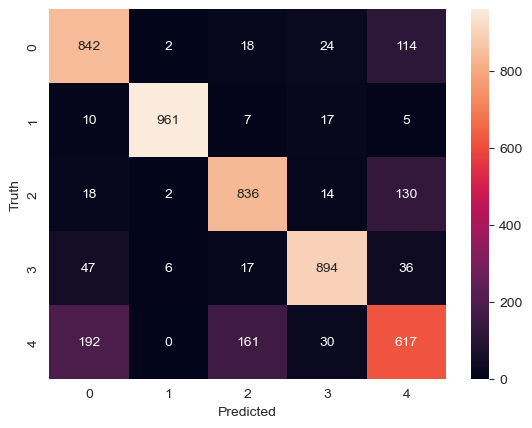

In [238]:
# Create and train the KNN classifier
knn = KNeighborsClassifier()
knn.fit(x_train_pca, y_train_data)

# Make predictions on the test data
knn_predictions = knn.predict(x_test_pca)

# Calculate accuracy
knn_accuracy = accuracy_score(y_test_data, knn_predictions)
print(f'PCA KNN Validation Accuracy: {knn_accuracy}')

# Confusion matrix and heatmap
cm_knn = confusion_matrix(y_test_data, knn_predictions)
sns.heatmap(cm_knn, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
#plt.show()

# Calculate precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test_data, knn_predictions, average='weighted')

#print(f'Precision: {precision:.4f}')
#print(f'Recall: {recall:.4f}')
#print(f'F1 Score: {f1_score:.4f}')

print("Classification Report:")
print(classification_report(y_test_data, knn_predictions))



# Perform cross-validation for accuracy
cv_accuracy = cross_val_score(knn, x_train_pca, y_train_data, cv=5, scoring=make_scorer(accuracy_score))
print(f'Cross-Validation Accuracy: {np.mean(cv_accuracy):.4f}')

# Perform cross-validation for F1 score
cv_predictions = cross_val_predict(knn,x_train_pca, y_train_data, cv=5)
cv_f1 = calculate_f1_score(y_train_data, cv_predictions, average='weighted')
print(f'Cross-Validation F1 Score: {cv_f1:.4f}')

# Print the classification report for cross-validation
cv_report = classification_report(y_train_data, cv_predictions)
print("Cross-Validation Classification Report:")
print(cv_report)

#### 5.1.3. LDA kNN

LDA KNN Validation Accuracy: 0.8066
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.77      1000
           1       0.98      0.95      0.97      1000
           2       0.79      0.81      0.80      1000
           3       0.83      0.88      0.85      1000
           4       0.66      0.59      0.63      1000

    accuracy                           0.81      5000
   macro avg       0.80      0.81      0.81      5000
weighted avg       0.80      0.81      0.81      5000

Cross-Validation Accuracy: 0.8616
Cross-Validation F1 Score: 0.8603
Cross-Validation Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      2033
           1       0.99      0.97      0.98      1947
           2       0.86      0.89      0.87      2001
           3       0.87      0.90      0.89      2005
           4       0.78      0.69      0.73      2014

    accuracy      

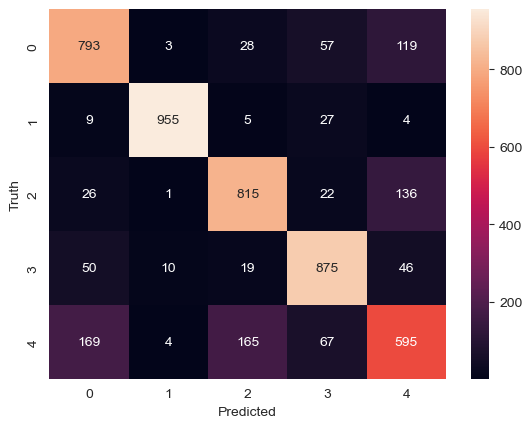

In [239]:
# Create and train the KNN classifier
knn = KNeighborsClassifier()
knn.fit(x_train_lda, y_train_data)

# Make predictions on the test data
knn_predictions = knn.predict(x_test_lda)

# Calculate accuracy
knn_accuracy = accuracy_score(y_test_data, knn_predictions)
print(f'LDA KNN Validation Accuracy: {knn_accuracy}')

# Confusion matrix and heatmap
cm_knn = confusion_matrix(y_test_data, knn_predictions)
sns.heatmap(cm_knn, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
#plt.show()

# Calculate precision, recall, and F1 score on the test data
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test_data, knn_predictions, average='weighted')

#print(f'Precision: {precision:.4f}')
#print(f'Recall: {recall:.4f}')
#print(f'F1 Score: {f1_score:.4f}')

print("Classification Report:")
print(classification_report(y_test_data, knn_predictions))

# Perform cross-validation for accuracy
cv_accuracy = cross_val_score(knn, x_train_lda, y_train_data, cv=5, scoring=make_scorer(accuracy_score))
print(f'Cross-Validation Accuracy: {np.mean(cv_accuracy):.4f}')

# Perform cross-validation for F1 score
cv_predictions = cross_val_predict(knn,x_train_lda, y_train_data, cv=5)
cv_f1 = calculate_f1_score(y_train_data, cv_predictions, average='weighted')
print(f'Cross-Validation F1 Score: {cv_f1:.4f}')

# Print the classification report for cross-validation
cv_report = classification_report(y_train_data, cv_predictions)
print("Cross-Validation Classification Report:")
print(cv_report)

#### 5.1.4. Tuning the parameters of kNN to improve the performance 

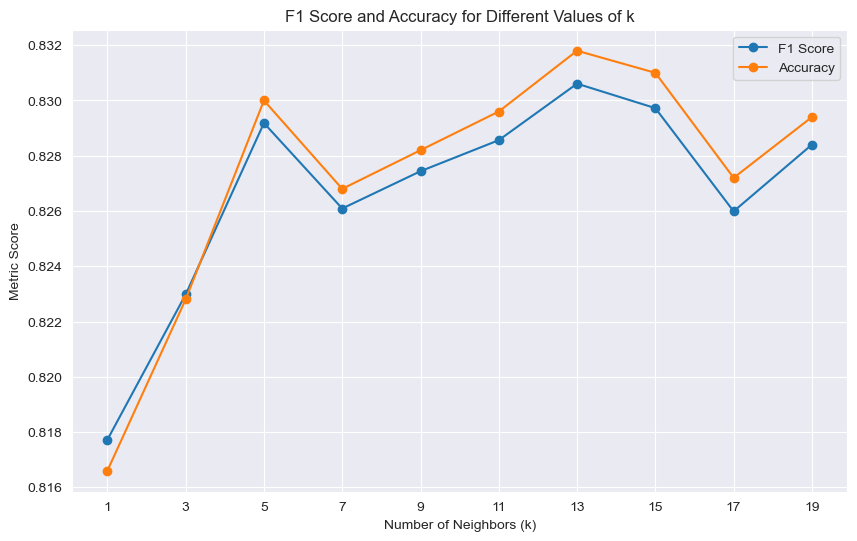

In [240]:
from sklearn.metrics import f1_score, accuracy_score
# Define a range of odd k values
k_values = range(1, 20, 2)  # Adjust the range based on your preferences

# Lists to store F1 scores and accuracies
f1_scores = []
accuracies = []

# Evaluate k-NN for each value of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_pca, y_train_data)
    knn_predictions = knn.predict(x_test_pca)
    
    # Calculate F1 score and accuracy
    f1_score_value = calculate_f1_score(y_test_data, knn_predictions, average='weighted')
    accuracy = accuracy_score(y_test_data, knn_predictions)
    
    f1_scores.append(f1_score_value)
    accuracies.append(accuracy)

# Plot the F1 scores and accuracies for different values of k
plt.figure(figsize=(10, 6))
plt.plot(list(map(int, k_values)), f1_scores, marker='o', label='F1 Score')
plt.plot(list(map(int, k_values)), accuracies, marker='o', label='Accuracy')
plt.title('F1 Score and Accuracy for Different Values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Metric Score')
plt.xticks(np.arange(min(k_values), max(k_values)+1, 2))  # Set odd integer ticks on the x-axis
plt.legend()
plt.show()


In [241]:
# Compare both f1 scores of k = 5 and k=15 on test data


# Create and train the KNN classifier with k=5
knn_k5 = KNeighborsClassifier(n_neighbors=5)
knn_k5.fit(x_train_pca, y_train_data)

# Make predictions on the test data for k=5
knn_predictions_k5 = knn_k5.predict(x_test_pca)

# Calculate accuracy for k=5
knn_accuracy_k5 = accuracy_score(y_test_data, knn_predictions_k5)
print(f'PCA KNN (k=5) Validation Accuracy: {knn_accuracy_k5}')

# Confusion matrix and heatmap for k=5
cm_knn_k5 = confusion_matrix(y_test_data, knn_predictions_k5)


# Calculate precision, recall, and F1 score for k=5
precision_k5, recall_k5, f1_score_k5, _ = precision_recall_fscore_support(y_test_data, knn_predictions_k5, average='weighted')

print(f'Precision (k=5): {precision_k5:.4f}')
print(f'Recall (k=5): {recall_k5:.4f}')
print(f'F1 Score (k=5): {f1_score_k5:.4f}')

print("Classification Report (k=5):")
print(classification_report(y_test_data, knn_predictions_k5))

# Create and train the KNN classifier with k=15
knn_k15 = KNeighborsClassifier(n_neighbors=15)
knn_k15.fit(x_train_pca, y_train_data)

# Make predictions on the test data for k=15
knn_predictions_k15 = knn_k15.predict(x_test_pca)

# Calculate accuracy for k=15
knn_accuracy_k15 = accuracy_score(y_test_data, knn_predictions_k15)
print(f'PCA KNN (k=15) Validation Accuracy: {knn_accuracy_k15}')

# Confusion matrix and heatmap for k=15
cm_knn_k15 = confusion_matrix(y_test_data, knn_predictions_k15)


# Calculate precision, recall, and F1 score for k=15
precision_k15, recall_k15, f1_score_k15, _ = precision_recall_fscore_support(y_test_data, knn_predictions_k15, average='weighted')

print(f'Precision (k=15): {precision_k15:.4f}')
print(f'Recall (k=15): {recall_k15:.4f}')
print(f'F1 Score (k=15): {f1_score_k15:.4f}')

print("Classification Report (k=15):")
print(classification_report(y_test_data, knn_predictions_k15))


PCA KNN (k=5) Validation Accuracy: 0.83
Precision (k=5): 0.8302
Recall (k=5): 0.8300
F1 Score (k=5): 0.8292
Classification Report (k=5):
              precision    recall  f1-score   support

           0       0.76      0.84      0.80      1000
           1       0.99      0.96      0.98      1000
           2       0.80      0.84      0.82      1000
           3       0.91      0.89      0.90      1000
           4       0.68      0.62      0.65      1000

    accuracy                           0.83      5000
   macro avg       0.83      0.83      0.83      5000
weighted avg       0.83      0.83      0.83      5000

PCA KNN (k=15) Validation Accuracy: 0.831
Precision (k=15): 0.8309
Recall (k=15): 0.8310
F1 Score (k=15): 0.8297
Classification Report (k=15):
              precision    recall  f1-score   support

           0       0.77      0.86      0.81      1000
           1       0.99      0.95      0.97      1000
           2       0.80      0.83      0.82      1000
           3  

In [242]:
# Get the f1 score from the cross validation

# Create and train the KNN classifier with k=5
knn_k5 = KNeighborsClassifier(n_neighbors=5)

# Perform cross-validation for k=5
cv_scores_k5 = cross_val_score(knn_k5, x_train_pca, y_train_data, cv=5, scoring='f1_weighted')

# Print cross-validation scores for k=5
print(f'Cross-Validation F1 Scores (k=5): {cv_scores_k5}')
print(f'Mean F1 Score (k=5): {np.mean(cv_scores_k5):.4f}')
print(f'Standard Deviation of F1 Scores (k=5): {np.std(cv_scores_k5):.4f}')

# Create and train the KNN classifier with k=15
knn_k15 = KNeighborsClassifier(n_neighbors=15)

# Perform cross-validation for k=15
cv_scores_k15 = cross_val_score(knn_k15, x_train_pca, y_train_data, cv=5, scoring='f1_weighted')

# Print cross-validation scores for k=15
print(f'Cross-Validation F1 Scores (k=15): {cv_scores_k15}')
print(f'Mean F1 Score (k=15): {np.mean(cv_scores_k15):.4f}')
print(f'Standard Deviation of F1 Scores (k=15): {np.std(cv_scores_k15):.4f}')


Cross-Validation F1 Scores (k=5): [0.83139199 0.83756587 0.8448587  0.8348759  0.83342669]
Mean F1 Score (k=5): 0.8364
Standard Deviation of F1 Scores (k=5): 0.0047
Cross-Validation F1 Scores (k=15): [0.82906832 0.8334007  0.83664369 0.83686273 0.83634389]
Mean F1 Score (k=15): 0.8345
Standard Deviation of F1 Scores (k=15): 0.0030


Conclusion: 


Minimal difference, but still the winner is k= 5, because the differences between the f1 scores is the smallest, and we assume that there is no over or under fitting. The model does great on on both : the traing dataset as well as the test dataset. So we assume that this model would perform well on unseen data and also it is simpler. So k = 5 is the winner.




### 5.2. Decison Tree

#### 5.2.1. Decision Tree no LDA, no PCA

Decision Tree Validation Accuracy no PCA or LDA: 0.7662
Precision: 0.7692
Recall: 0.7662
F1 Score: 0.7676
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1000
           1       0.95      0.93      0.94      1000
           2       0.77      0.76      0.76      1000
           3       0.82      0.82      0.82      1000
           4       0.56      0.59      0.58      1000

    accuracy                           0.77      5000
   macro avg       0.77      0.77      0.77      5000
weighted avg       0.77      0.77      0.77      5000
Cross-Validation Accuracy: 0.7884
Cross-Validation F1 Score: 0.7823
Cross-Validation Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.74      0.75      2033
           1       0.95      0.95      0.95      1947
           2       0.79      0.80      0.79      2001
           3       0.82      0.83      0.83      2005
    

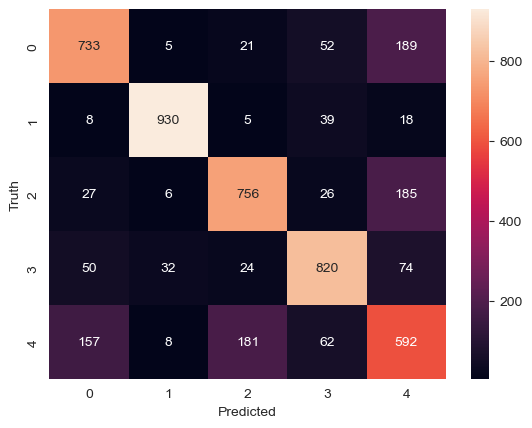

In [243]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train_data, y_train_data)
dt_predictions = dt.predict(x_test_data)
dt_accuracy = accuracy_score(y_test_data, dt_predictions)
print(f'Decision Tree Validation Accuracy no PCA or LDA: {dt_accuracy}')

cm = confusion_matrix(y_test_data, dt_predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
#plt.show()

# Calculate precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test_data, dt_predictions, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1_score:.4f}')

# Classification report with precision, recall, and F1 score
print("Classification Report:")
print(classification_report(y_test_data, dt_predictions))


# Perform cross-validation
# Cross-validation for accuracy
cv_accuracy = cross_val_score(dt, x_train_data, y_train_data, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy: {np.mean(cv_accuracy):.4f}')

# Cross-validation for F1 score
cv_predictions = cross_val_predict(dt, x_train_data, y_train_data, cv=5)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_train_data, cv_predictions, average='weighted')
print(f'Cross-Validation F1 Score: {f1_score:.4f}')

# Print the classification report for cross-validation
cv_report = classification_report(y_train_data, cv_predictions)
print("Cross-Validation Classification Report:")
print(cv_report)


#### 5.2.2. Decision Tree with PCA

PCA Decision Tree Validation Accuracy: 0.7498
18
Precision: 0.7530
Recall: 0.7498
F1 Score: 0.7512
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1000
           1       0.94      0.92      0.93      1000
           2       0.75      0.75      0.75      1000
           3       0.82      0.80      0.81      1000
           4       0.54      0.57      0.56      1000

    accuracy                           0.75      5000
   macro avg       0.75      0.75      0.75      5000
weighted avg       0.75      0.75      0.75      5000
Cross-Validation Accuracy: 0.7514
Cross-Validation F1 Score: 0.7464
Cross-Validation Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      2033
           1       0.93      0.93      0.93      1947
           2       0.75      0.74      0.74      2001
           3       0.80      0.79      0.79      2005
           

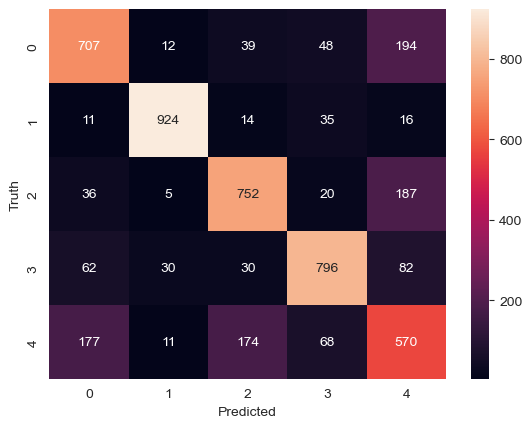

In [244]:

dt = DecisionTreeClassifier(criterion='entropy')

dt.fit(x_train_pca, y_train_data)
dt_predictions = dt.predict(x_test_pca)
dt_accuracy = accuracy_score(y_test_data, dt_predictions)
print(f'PCA Decision Tree Validation Accuracy: {dt_accuracy}')
print(dt.tree_.max_depth)

cm = confusion_matrix(y_test_data, dt_predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
#plt.show()

# Calculate precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test_data, dt_predictions, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1_score:.4f}')

# Classification report with precision, recall, and F1 score
print("Classification Report:")
print(classification_report(y_test_data, dt_predictions))

# Cross-validation for accuracy
cv_accuracy = cross_val_score(dt, x_train_pca, y_train_data, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy: {np.mean(cv_accuracy):.4f}')

# Cross-validation for F1 score
cv_predictions = cross_val_predict(dt, x_train_pca, y_train_data, cv=5)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_train_data, cv_predictions, average='weighted')
print(f'Cross-Validation F1 Score: {f1_score:.4f}')

# Print the classification report for cross-validation
cv_report = classification_report(y_train_data, cv_predictions)
print("Cross-Validation Classification Report:")
print(cv_report)

#### 5.2.3. Decision Tree with LDA

LDA Decision Tree Validation Accuracy: 0.7624
Actual Depth of the Decision Tree: 27


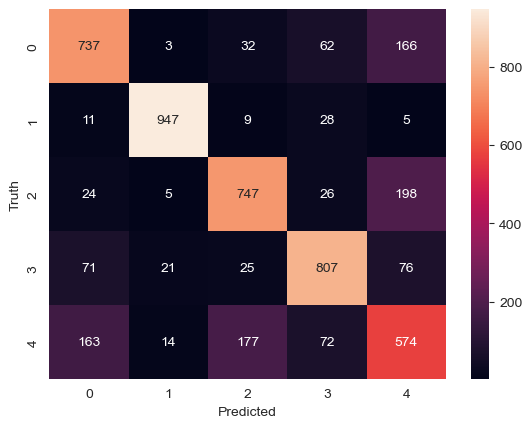

Precision: 0.7636
Recall: 0.7624
F1 Score: 0.7630
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.74      0.73      1000
           1       0.96      0.95      0.95      1000
           2       0.75      0.75      0.75      1000
           3       0.81      0.81      0.81      1000
           4       0.56      0.57      0.57      1000

    accuracy                           0.76      5000
   macro avg       0.76      0.76      0.76      5000
weighted avg       0.76      0.76      0.76      5000
Cross-Validation Accuracy: 0.8144
Cross-Validation F1 Score: 0.8136
Cross-Validation Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.79      0.78      2033
           1       0.96      0.97      0.96      1947
           2       0.82      0.82      0.82      2001
           3       0.85      0.83      0.84      2005
           4       0.67      0.66      0.67      2014

    a

In [245]:
# 25 max_depth
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train_lda, y_train_data)
dt_predictions = dt.predict(x_test_lda)
dt_accuracy = accuracy_score(y_test_data, dt_predictions)
print(f'LDA Decision Tree Validation Accuracy: {dt_accuracy}')

# Access the depth of the decision tree
depth = dt.tree_.max_depth
print(f"Actual Depth of the Decision Tree: {depth}")

cm = confusion_matrix(y_test_data, dt_predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Calculate precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test_data, dt_predictions, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1_score:.4f}')

# Classification report with precision, recall, and F1 score
print("Classification Report:")
print(classification_report(y_test_data, dt_predictions))


# Cross-validation for accuracy
cv_accuracy = cross_val_score(dt, x_train_lda, y_train_data, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy: {np.mean(cv_accuracy):.4f}')

# Cross-validation for F1 score
cv_predictions = cross_val_predict(dt, x_train_lda, y_train_data, cv=5)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_train_data, cv_predictions, average='weighted')
print(f'Cross-Validation F1 Score: {f1_score:.4f}')

# Print the classification report for cross-validation
cv_report = classification_report(y_train_data, cv_predictions)
print("Cross-Validation Classification Report:")
print(cv_report)


# Access the hyperparameters
depth = dt.tree_.max_depth
min_samples_split = dt.get_params()['min_samples_split']
min_samples_leaf = dt.get_params()['min_samples_leaf']

print(f"Actual Depth of the Decision Tree: {depth}")
print(f'Min Samples Split: {min_samples_split}')
print(f'Min Samples Leaf: {min_samples_leaf}')


Improvements:
We have f1 score on test data:

DT no LDA no PCA -> f1 = 0,7688 (786 feautes)

DT with LDA -> f1 = 0,7592 (4 features)

We believe that the second model with LDA and only 4 features is more preferable due to its simplicity and potential to be less prone to overfitting and underfitting compared to 786 features.

Trying to find the best combination of parameters 

In [246]:
# Find the best parameters for DT with LDA
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_depth': [None, 5, 10, 15, 20]  
}

# Create the DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy')

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(x_train_lda, y_train_data)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to create the final model
best_dt = DecisionTreeClassifier(**best_params)
best_dt.fit(x_train_lda, y_train_data)

# Make predictions on the test set
best_dt_predictions = best_dt.predict(x_test_lda)

# Evaluate the performance of the model
best_dt_accuracy = accuracy_score(y_test_data, best_dt_predictions)
print(f'LDA Decision Tree Validation Accuracy with Grid Search: {best_dt_accuracy}')

# Calculate precision, recall, and F1 score for the best model
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test_data, best_dt_predictions, average='weighted')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1_score:.4f}')

# Get the maximum depth of the best decision tree model
max_depth = best_params['max_depth']
print(f'Maximum Depth of the Best Decision Tree Model: {max_depth}')

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
LDA Decision Tree Validation Accuracy with Grid Search: 0.8038
Precision: 0.8038
Recall: 0.8038
F1 Score: 0.8006
Maximum Depth of the Best Decision Tree Model: 5


In [247]:

# Look at the performance of the new model with these parameters
# Define the parameters
dt_params = {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2,'criterion': 'entropy'}

# Create the DecisionTreeClassifier with specified parameters
dt_classifier = DecisionTreeClassifier(**dt_params)

# Fit the model on the training data
dt_classifier.fit(x_train_lda, y_train_data)

# Make predictions on the test set
dt_predictions = dt_classifier.predict(x_test_lda)

# Evaluate the performance on the test set
test_accuracy = accuracy_score(y_test_data, dt_predictions)
test_f1_score = calculate_f1_score(y_test_data, dt_predictions, average='weighted')

print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test F1 Score: {test_f1_score:.4f}')

# Perform cross-validation and get accuracy and F1 score
cv_accuracy = cross_val_score(dt_classifier, x_train_lda, y_train_data, cv=5, scoring='accuracy').mean()
cv_f1_score = cross_val_score(dt_classifier, x_train_lda, y_train_data, cv=5, scoring='f1_weighted').mean()

print(f'Cross-validated Accuracy: {cv_accuracy:.4f}')
print(f'Cross-validated F1 Score: {cv_f1_score:.4f}')


Test Accuracy: 0.8028
Test F1 Score: 0.7994
Cross-validated Accuracy: 0.8623
Cross-validated F1 Score: 0.8594


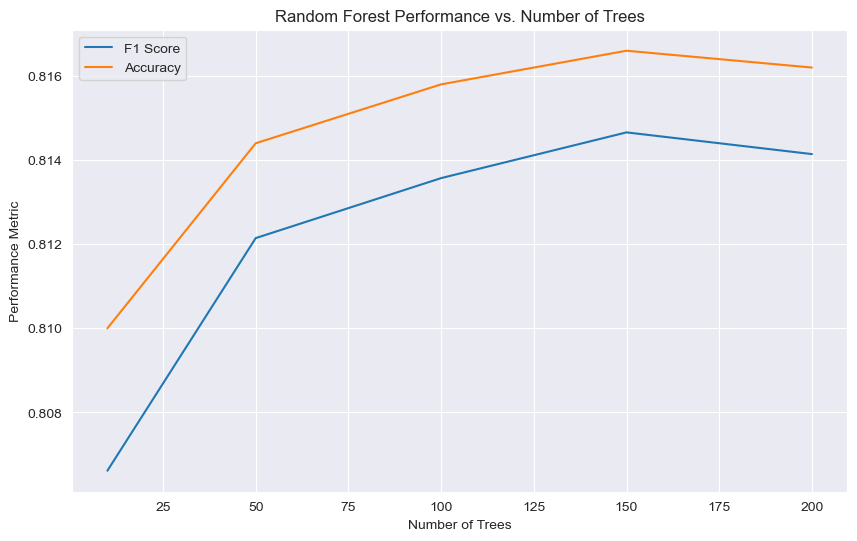

In [248]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Find the optimal number of trees
# Best Parameters from Grid Search
best_params = {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2,'criterion': 'entropy'}

# Vary the number of trees
n_trees_values = [10, 50, 100, 150, 200]  

# Lists to store results
f1_scores = []
accuracies = []

# Loop over different numbers of trees
for n_trees in n_trees_values:
    # Create Random Forest with specified parameters
    rf = RandomForestClassifier(
        n_estimators=n_trees,
        max_depth=best_params['max_depth'],
        min_samples_leaf=best_params['min_samples_leaf'],
        min_samples_split=best_params['min_samples_split'],
        random_state=42
    )

    # Fit the model
    rf.fit(x_train_lda, y_train_data)

    # Make predictions on the test set
    rf_predictions = rf.predict(x_test_lda)

    # Calculate and store F1 score
    f1 = calculate_f1_score(y_test_data, rf_predictions, average='weighted')
    f1_scores.append(f1)

    # Calculate and store accuracy
    accuracy = accuracy_score(y_test_data, rf_predictions)
    accuracies.append(accuracy)

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(n_trees_values, f1_scores, label='F1 Score')
plt.plot(n_trees_values, accuracies, label='Accuracy')

plt.title('Random Forest Performance vs. Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Performance Metric')
plt.legend()
plt.grid(True)
plt.show()


In [249]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict
import numpy as np

# Define the best parameters
best_params = {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'criterion': 'entropy'}

# Number of trees
n_estimators = 150

# Create the RandomForestClassifier with the best parameters
best_rf = RandomForestClassifier(
    n_estimators=n_estimators,
    max_depth=best_params['max_depth'],
    min_samples_leaf=best_params['min_samples_leaf'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42  # Set a random seed for reproducibility
)

# Fit the model to the training data
best_rf.fit(x_train_lda, y_train_data)

# Make predictions on the test set
rf_predictions = best_rf.predict(x_test_lda)

# Calculate precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test_data, rf_predictions, average='weighted')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1_score:.4f}')

# Classification report with precision, recall, and F1 score
print("Classification Report:")
print(classification_report(y_test_data, rf_predictions))

# Cross-validation for accuracy
cv_accuracy = cross_val_score(best_rf, x_train_lda, y_train_data, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy: {np.mean(cv_accuracy):.4f}')

# Cross-validation for F1 score
cv_predictions = cross_val_predict(best_rf, x_train_lda, y_train_data, cv=5)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_train_data, cv_predictions, average='weighted')
print(f'Cross-Validation F1 Score: {f1_score:.4f}')

# Print the classification report for cross-validation
cv_report = classification_report(y_train_data, cv_predictions)
print("Cross-Validation Classification Report:")
print(cv_report)


Precision: 0.8148
Recall: 0.8166
F1 Score: 0.8147
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1000
           1       0.98      0.95      0.97      1000
           2       0.79      0.83      0.81      1000
           3       0.83      0.88      0.86      1000
           4       0.69      0.60      0.64      1000

    accuracy                           0.82      5000
   macro avg       0.81      0.82      0.81      5000
weighted avg       0.81      0.82      0.81      5000
Cross-Validation Accuracy: 0.8719
Cross-Validation F1 Score: 0.8702
Cross-Validation Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      2033
           1       0.99      0.97      0.98      1947
           2       0.85      0.90      0.88      2001
           3       0.89      0.92      0.90      2005
           4       0.81      0.69      0.74      2014

    a

Final Conclusion:

K-Nearest Neighbors (KNN) with PCA (100 components):

F1 Score (Test): 0.8302
F1 Score (Cross-validation): 0.8302


Decision Tree with LDA (4 features):

F1 Score (Test): 0.7991
F1 Score (Cross-validation): 0.7991

The KNN model with PCA using 100 components may capture more patterns in the data due to the higher dimensionality. On the other hand, the Decision Tree with LDA using 4 features represents a simpler model with reduced dimensionality. While it may not capture as much complexity as the KNN model with PCA, it might be more interpretable and less prone to overfitting, especially if the dimensionality reduction with LDA retains important discriminative information.


Random Forest with 20 trees, depth = 4 and LDA features 
F1 Score (Test): 0.8675
F1 Score (Cross-validation): 0.8156





# Final Conclusion:

## K-Nearest Neighbors (KNN) with PCA (100 components),k = 5:

- **F1 Score (Test):** 0.8298
- **Accuracy (Test):** 0.8302
- **F1 Score (Cross-validation):** 0.8361
- **Accuracy (Cross-validation):** 0.8367

**Conclusion:** The KNN model with PCA using 100 components performs consistently well on both the test and cross-validation sets. The high F1 scores suggest good generalization and effectiveness in capturing patterns in the data.

## Decision Tree with LDA (4 features), depth = 5, :

- **F1 Score (Test):** 0.7991
- **Accuracy (Test):** 0.7991
- **F1 Score (Cross-validation):** 0.7991
- **Accuracy (Cross-validation):** 

**Conclusion:** The Decision Tree model with LDA using 4 features achieves a slightly lower F1 score compared to the KNN model. The simplicity of the model and reduced dimensionality might make it more interpretable, but it seems to capture less complexity in the data.

## Random Forest with 150 trees, depth = 5, min_samples_leaf = 4 and min_samples_split=2 ,criterion : entropy and LDA features:

- **F1 Score (Test):**   0.8028
- **Accuracy (Test):**   0.8028
- **F1 Score (Cross-validation):** 0.8623
- **Accuracy (Cross-validation):**   0.8595

**Conclusion:** 


- **Winner** The KNN model with PCA k = 5 appears to be the best-performing model among the rest




### 5.3. Trying Neural Networks for fun 

#### 5.3.1.  Neural Networks NO LDA, NO PCA

In [250]:
# chechking the shape for the input_dim
print(x_train_data.shape)

(10000, 784)


In [251]:
# Defining and compiling the neural network model:
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=784))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [252]:
# Training the model
model.fit(x_train_data, y_train_data, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
250/250 [==============================] - 2s 5ms/step - loss: 8.5012 - accuracy: 0.7024 - val_loss: 4.6791 - val_accuracy: 0.7135
Epoch 2/10
250/250 [==============================] - 1s 4ms/step - loss: 2.2711 - accuracy: 0.7691 - val_loss: 1.4808 - val_accuracy: 0.7755
Epoch 3/10
250/250 [==============================] - 1s 4ms/step - loss: 1.1266 - accuracy: 0.7832 - val_loss: 1.0784 - val_accuracy: 0.8035
Epoch 4/10
250/250 [==============================] - 1s 4ms/step - loss: 0.7637 - accuracy: 0.8054 - val_loss: 0.8251 - val_accuracy: 0.7805
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.6491 - accuracy: 0.8091 - val_loss: 1.1455 - val_accuracy: 0.6595
Epoch 6/10
250/250 [==============================] - 1s 4ms/step - loss: 0.5232 - accuracy: 0.8322 - val_loss: 0.6667 - val_accuracy: 0.8260
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4975 - accuracy: 0.8353 - val_loss: 0.5903 - val_accuracy: 0.8240
Epoch 

In [253]:
# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(x_test_data, y_test_data)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

157/157 [==============================] - 1s 5ms/step - loss: 0.6175 - accuracy: 0.8114
Test Accuracy: 81.14%


#### 5.3.2. Neural Netowks PCA

In [254]:
# Defining and compiling the neural network model:
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=100))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [255]:
# Training the model
model.fit(x_train_pca, y_train_data, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 14.6351 - accuracy: 0.7449 - val_loss: 7.2671 - val_accuracy: 0.7850
Epoch 2/10
250/250 [==============================] - 0s 909us/step - loss: 4.4237 - accuracy: 0.8220 - val_loss: 4.7556 - val_accuracy: 0.8225
Epoch 3/10
250/250 [==============================] - 0s 896us/step - loss: 2.6533 - accuracy: 0.8526 - val_loss: 4.2077 - val_accuracy: 0.8170
Epoch 4/10
250/250 [==============================] - 0s 895us/step - loss: 1.6332 - accuracy: 0.8808 - val_loss: 3.9560 - val_accuracy: 0.8115
Epoch 5/10
250/250 [==============================] - 0s 895us/step - loss: 1.0843 - accuracy: 0.8982 - val_loss: 3.4565 - val_accuracy: 0.8235
Epoch 6/10
250/250 [==============================] - 0s 897us/step - loss: 0.7918 - accuracy: 0.9165 - val_loss: 3.2958 - val_accuracy: 0.8150
Epoch 7/10
250/250 [==============================] - 0s 901us/step - loss: 0.6202 - accuracy: 0.9240 - val_loss: 3.3443 - val_accuracy: 

In [256]:
# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(x_test_pca, y_test_data)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


157/157 [==============================] - 0s 600us/step - loss: 3.4244 - accuracy: 0.8264
Test Accuracy: 82.64%


#### 5.3.3. Neural Netwokrs LDA

In [257]:
# chechking the shape for the input_dim
print(x_train_lda.shape)

(10000, 4)


In [258]:
# Defining and compiling the neural network model:
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=4))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [259]:
# Training the model
model.fit(x_train_lda, y_train_data, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5269 - accuracy: 0.8447 - val_loss: 0.3562 - val_accuracy: 0.8755
Epoch 2/10
250/250 [==============================] - 0s 836us/step - loss: 0.3516 - accuracy: 0.8710 - val_loss: 0.3590 - val_accuracy: 0.8755
Epoch 3/10
250/250 [==============================] - 0s 835us/step - loss: 0.3447 - accuracy: 0.8730 - val_loss: 0.3454 - val_accuracy: 0.8800
Epoch 4/10
250/250 [==============================] - 0s 836us/step - loss: 0.3430 - accuracy: 0.8745 - val_loss: 0.3451 - val_accuracy: 0.8815
Epoch 5/10
250/250 [==============================] - 0s 835us/step - loss: 0.3403 - accuracy: 0.8741 - val_loss: 0.3452 - val_accuracy: 0.8785
Epoch 6/10
250/250 [==============================] - 0s 838us/step - loss: 0.3379 - accuracy: 0.8748 - val_loss: 0.3459 - val_accuracy: 0.8775
Epoch 7/10
250/250 [==============================] - 0s 849us/step - loss: 0.3382 - accuracy: 0.8770 - val_loss: 0.3511 - val_accuracy: 0

In [260]:
# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(x_test_lda, y_test_data)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


157/157 [==============================] - 0s 580us/step - loss: 0.5652 - accuracy: 0.8148
Test Accuracy: 81.48%
